In [1]:
# CONTAINS ALL NECESSARY FUNCTIONALITY FOR THIS EXERCISE:
from Modules import OIP20_lib_ImageProcessing_V7_16bit as ip  
# (for this to work, you need:
#  * a subfolder named "Modules" in your Notebook folder
#  * in this subdfolder you need an empty file named "__init__.py"
#  * and of course the library (.py file) named "OIP20_lib_ImageProcessing_V1.py")

# if you want to use other functionality here, you need to load the libraries again: 
import matplotlib.pyplot as plt # We need this here only for closing the open windows
import numpy as np # we want to use some math...
from Modules import tictoc as t

# for nice(r) potting in the notebook
%matplotlib inline 

##  If not in Jupyter: close all open plots (otherwise you will get tons of them after some time...)
# plt.close("all")

# Some house holding: 
#  Higher resolution for figures:
%config InlineBackend.figure_format = 'retina' # (doubles the plot dpi)

# for interactive graphing: 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
particles_frequency_001 = np.load('./images/dataset/001_particles.npy')
diameter_frequency_001 = np.load('./images/dataset/001_diameter.npy')

In [3]:
particles_frequency_006 = np.load('./images/dataset/006_particles.npy')
diameter_frequency_006 = np.load('./images/dataset/006_diameter.npy')

In [4]:
particles_frequency = np.concatenate((particles_frequency_001,particles_frequency_006))
diameter_frequency = np.concatenate((diameter_frequency_001,diameter_frequency_006))

In [5]:
from matplotlib.ticker import MaxNLocator
import collections

def plot_result(result, xlabel='x', ylabel='y'):
    fig, ax = plt.subplots(1,3,figsize=(20,5))
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel, color='tab:blue')
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax[0].axvline(np.mean(result), color='k', linestyle='--', linewidth=3)
    ax[0].axvline(np.median(result), color='b', linestyle='-', linewidth=3)
    ax[0].text(np.mean(result), np.amax(result), 'Mean: {:.2f}'.format(np.mean(result)))
    ax[0].text(np.median(result), np.amax(result)*0.7, 'Median: {:.2f}'.format(np.median(result)))
    
#     counts, bins = np.histogram(result)
#     ax[0].hist(bins[:-1], bins, weights=counts)
    hist = collections.Counter(result)
    ax[0].bar(hist.keys(),hist.values(),width=1)

    
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(ylabel, color='tab:blue')
    ax[1].boxplot(result, vert=False)
    
    ax[2].set_xlabel(xlabel)
    ax[2].set_ylabel(ylabel, color='tab:blue')
    ax[2].violinplot(result, vert=False)
    plt.show() 

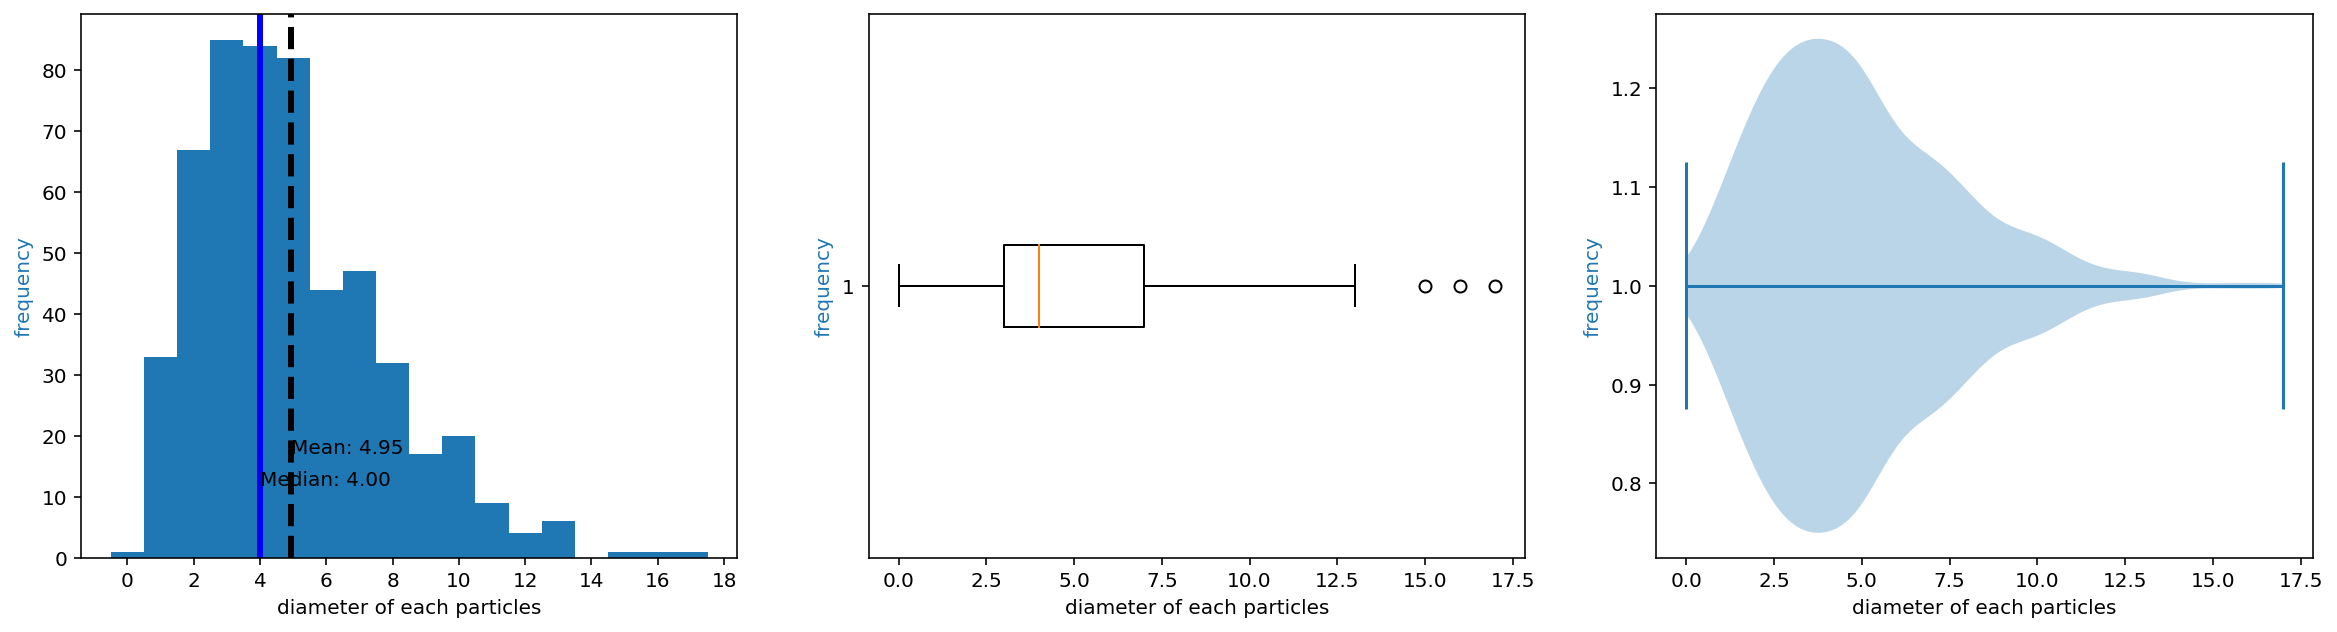

In [6]:
plot_result(particles_frequency, xlabel='diameter of each particles', ylabel='frequency')

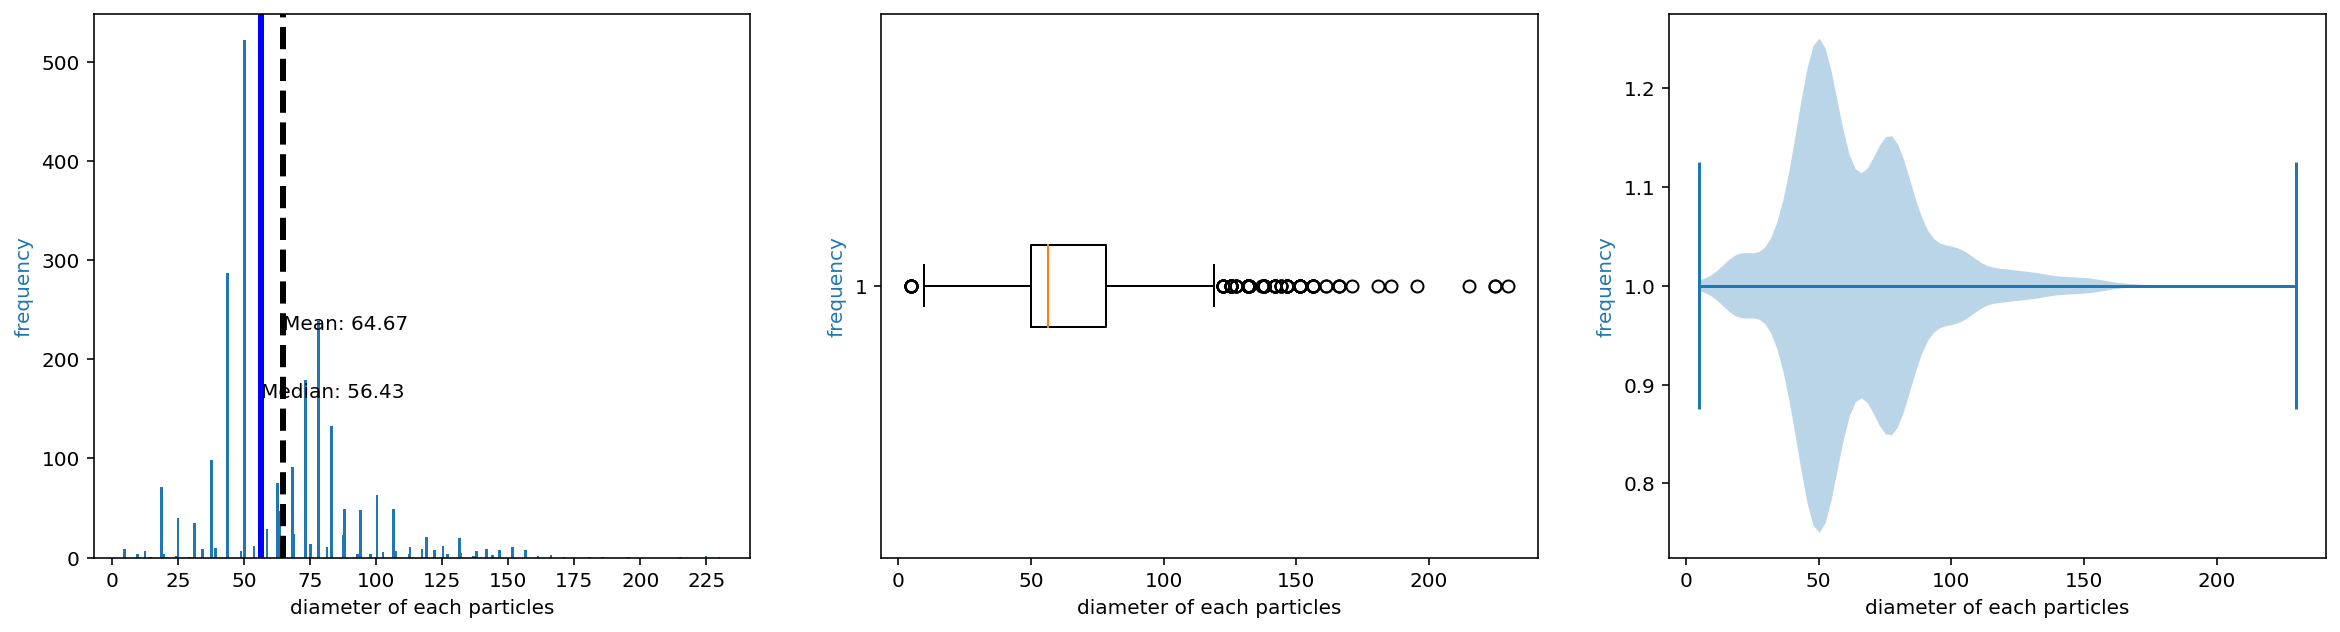

In [7]:
plot_result(diameter_frequency, xlabel='diameter of each particles', ylabel='frequency')

In [8]:
def statistic(result):
#     print(result)
    print(np.mean(result)) # sum of all the entries divided by the number of entries / the average value 
    print(np.median(result)) # the middle point of the number of entries
    print(np.var(result)) # measures how far a set of numbers is spread out from their average value
    print(np.std(result)) # a measure of the amount of variation or dispersion of a set of values.

In [9]:
statistic(particles_frequency)

4.949438202247191
4.0
7.75212515254808
2.784263843917828


In [10]:
statistic(diameter_frequency)

64.6696869704177
56.426332288401255
724.4480997200399
26.915573553614642


In [11]:
import collections 

std1 = np.std(particles_frequency)
mean1 = np.mean(particles_frequency)

hist1 = collections.Counter(particles_frequency)
sorted_hist1 = {i: hist1[i] for i in sorted(hist1)}
X1 = np.array(list(sorted_hist1.keys()))
Y1 = np.array(list(sorted_hist1.values()))
print(X1)
print(Y1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17]
[ 1 33 67 85 84 82 44 47 32 17 20  9  4  6  1  1  1]


In [12]:
from sympy import *
A, B = symbols("A B")
def gaussian_func(A, B, x):
    return (A/(std1*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-mean1)/std1)**2) + B

def residual(A, B, x, y):
    return y - gaussian_func(A, B, x)

def calc_error(A, B, x, y):
    return sum(residual(A, B, x, y)**2)

In [13]:
f = calc_error(A, B, X1, Y1)
grad_f = Matrix([f]).jacobian([A, B])
grad_ff=hessian(f,[A,B]) ## Hessian  

In [14]:
X= np.array([[0.1],[0.2]]) ## Intial guess x_n
xk=X[0][0] ## Intial guess x_n
yk=X[1][0] ## Intial guess x_n
print(X[1][0])
epsilon = 1e-6 # Pick the tolerance 
count = 0 # for the number of iteration 
nMax=30 # maximum number of iteration

0.2


In [15]:
while count < nMax:
    count += 1 # count the loop iterations...
    df = transpose(grad_f.subs({A:xk, B:yk}))
    dff = grad_ff.subs({A:xk, B:yk})
    H=np.array([[dff[0,0],dff[0,1]],[dff[1,0],dff[1,1]]])
    H=H.astype(float)
    xn=np.array([[xk],[yk]])
    X=X-np.linalg.inv(H)*df
    Xn=np.array(X)
    xk=Xn[0][0]
    yk=Xn[1][0]
    #error=np.sqrt((xk-xn[0][0])**2+(yk-xn[1][0])**2)
    print('Step: %i-- new guess x: %e-- new guess y: %e' %(count,xk,yk))

Step: 1-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 2-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 3-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 4-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 5-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 6-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 7-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 8-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 9-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 10-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 11-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 12-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 13-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 14-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 15-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 16-- new guess x: 5.386900e+

<BarContainer object of 17 artists>

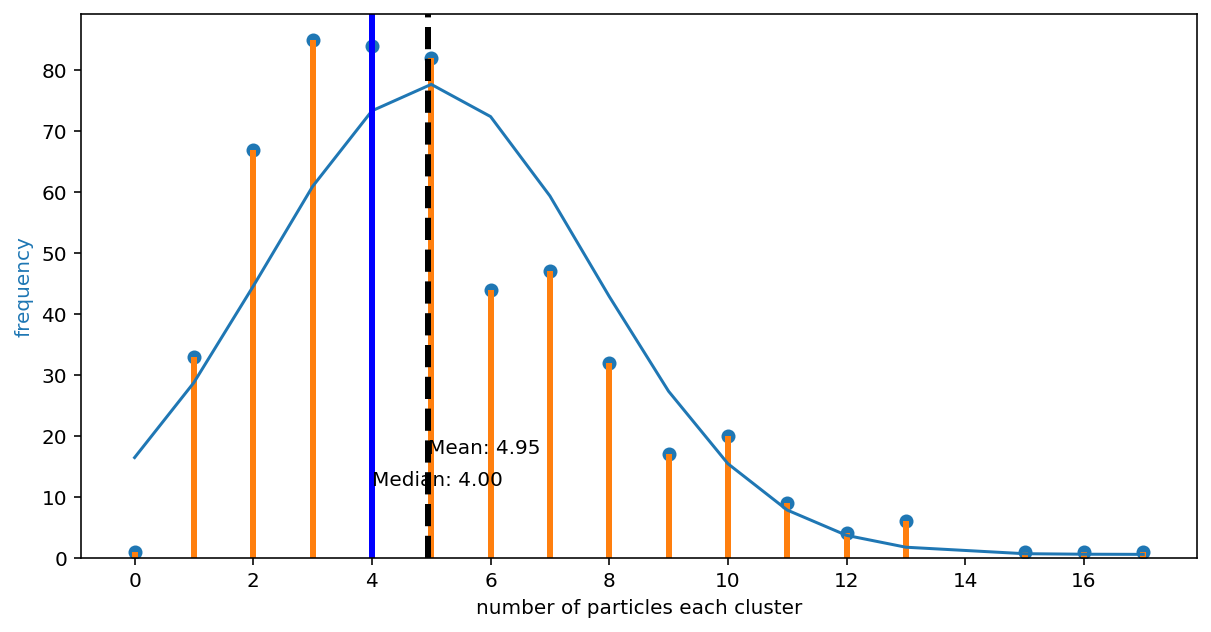

In [16]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5))
ax.scatter(X1, Y1, marker= 'o')

ax.plot(X1,gaussian_func(xk, yk, X1)) #random number
ax.set_xlabel('number of particles each cluster')
ax.set_ylabel('frequency', color='tab:blue')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.axvline(np.mean(particles_frequency), color='k', linestyle='--', linewidth=3)
ax.axvline(np.median(particles_frequency), color='b', linestyle='-', linewidth=3)
ax.text(np.mean(particles_frequency), np.amax(particles_frequency), 'Mean: {:.2f}'.format(np.mean(particles_frequency)))
ax.text(np.median(particles_frequency), np.amax(particles_frequency)*0.7, 'Median: {:.2f}'.format(np.median(particles_frequency)))

hist = collections.Counter(particles_frequency)
ax.bar(hist.keys(),hist.values(),width=0.1)

In [17]:
# xk1, yk1, pk1, xk2, yk2, pk2 = symbols("xk1 yk1 pk1 xk2 yk2 pk2")
# def lorent_func(xk1, yk1, pk1, xk2, yk2, pk2, x):
#     return (yk1*pk1**2)/((x-xk1)**2+pk1**2) + (yk2*pk2**2)/((x-xk2)**2+pk2**2)

# def residual(xk1, yk1, pk1, xk2, yk2, pk2, x, y):
#     return y - lorent_func(xk1, yk1, pk1, xk2, yk2, pk2, x)

# def calc_error(xk1, yk1, pk1, xk2, yk2, pk2, x, y):
#     return sum(residual(xk1, yk1, pk1, xk2, yk2, pk2, x, y)**2)

In [18]:
std2 = np.std(diameter_frequency)
mean2 = np.mean(diameter_frequency)

hist2 = collections.Counter(diameter_frequency)
sorted_hist2 = {i: hist2[i] for i in sorted(hist2)}
X2 = np.array(list(sorted_hist2.keys()))
Y2 = np.array(list(sorted_hist2.values()))
print(len(X2))
# print(Y2)

63


In [19]:
from sympy import *
A, B = symbols("A B")
def gaussian_func(A, B, x):
    return (A/(std2*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-mean2)/std2)**2) + B

def residual(A, B, x, y):
    return y - gaussian_func(A, B, x)

def calc_error(A, B, x, y):
    return sum(residual(A, B, x, y)**2)

In [20]:
f = calc_error(A, B, X2, Y2)
grad_f = Matrix([f]).jacobian([A, B])
grad_ff=hessian(f,[A,B]) ## Hessian  

In [21]:
X= np.array([[1],[2]]) ## Intial guess x_n
xk=X[0][0] ## Intial guess x_n
yk=X[1][0] ## Intial guess x_n
# print(X[1][0])
epsilon = 1e-6 # Pick the tolerance 
count = 0 # for the number of iteration 
nMax=30 # maximum number of iteration

In [22]:
while count < nMax:
    count += 1 # count the loop iterations...
    df = transpose(grad_f.subs({A:xk, B:yk}))
    dff = grad_ff.subs({A:xk, B:yk})
    H=np.array([[dff[0,0],dff[0,1]],[dff[1,0],dff[1,1]]])
    H=H.astype(float)
    xn=np.array([[xk],[yk]])
    X=X-np.linalg.inv(H)*df
    Xn=np.array(X)
    xk=Xn[0][0]
    yk=Xn[1][0]
    #error=np.sqrt((xk-xn[0][0])**2+(yk-xn[1][0])**2)
    print('Step: %i-- new guess x: %e-- new guess y: %e' %(count,xk,yk))

Step: 1-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 2-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 3-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 4-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 5-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 6-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 7-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 8-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 9-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 10-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 11-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 12-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 13-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 14-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 15-- new guess x: 7.991986e+03-- new guess y: -3.534136e+00
Step: 16-- new gues

<BarContainer object of 63 artists>

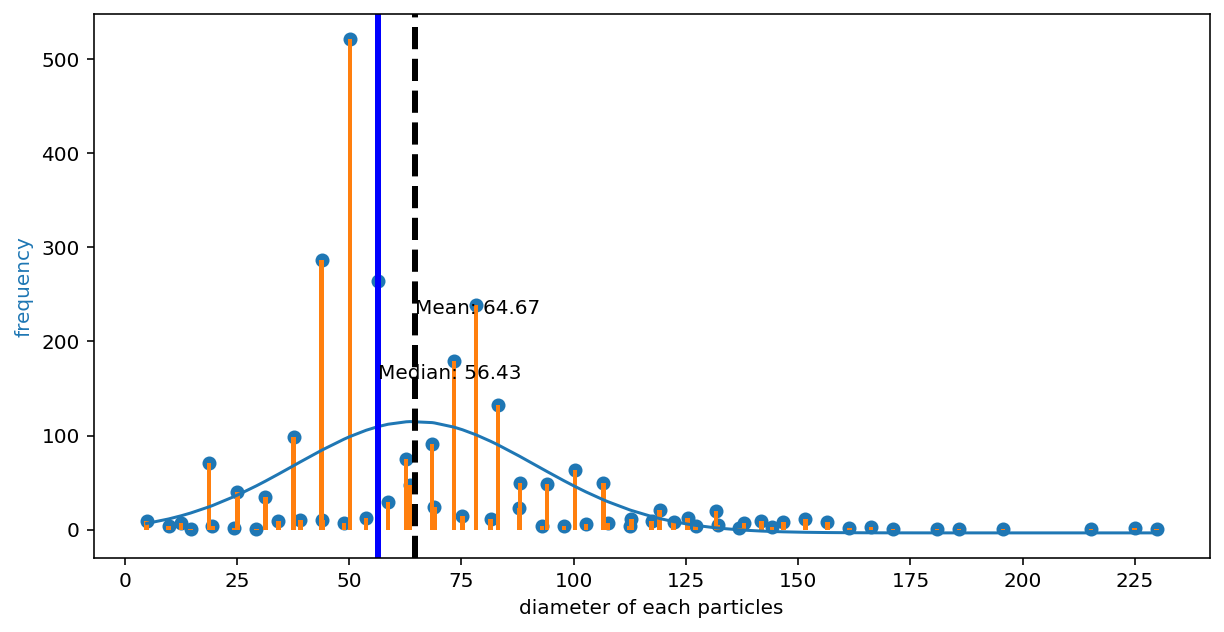

In [23]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5))
ax.scatter(X2, Y2, marker= 'o')

ax.plot(X2,gaussian_func(xk, yk, X2)) #random number
ax.set_xlabel('diameter of each particles')
ax.set_ylabel('frequency', color='tab:blue')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.axvline(np.mean(diameter_frequency), color='k', linestyle='--', linewidth=3)
ax.axvline(np.median(diameter_frequency), color='b', linestyle='-', linewidth=3)
ax.text(np.mean(diameter_frequency), np.amax(diameter_frequency), 'Mean: {:.2f}'.format(np.mean(diameter_frequency)))
ax.text(np.median(diameter_frequency), np.amax(diameter_frequency)*0.7, 'Median: {:.2f}'.format(np.median(diameter_frequency)))
hist = collections.Counter(diameter_frequency)
ax.bar(hist.keys(),hist.values(),width=1)